In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter


In [3]:
df = pd.DataFrame({
    'sale': [32, 59, 148, 248, 209, 40, 32],
    'province': ['Quảng Trị', 'Quảng Trị', 'Đà Nẵng','Hồ Chí Minh', 'Hà Nội', 'Phú Thọ', 'Bình Dương']
})
df.head()

,sale,province
0,32,Quảng Trị
1,59,Quảng Trị
2,148,Đà Nẵng
3,248,Hồ Chí Minh
4,209,Hà Nội


In [4]:
df_pareto = df.groupby('province').sum()
df_pareto= df_pareto.sort_values(by='sale', ascending = False)
df_pareto

,sale
province,
Hồ Chí Minh,248
Hà Nội,209
Đà Nẵng,148
Quảng Trị,91
Phú Thọ,40
Bình Dương,32


In [5]:
df_pareto['cummulative'] = df_pareto['sale'].cumsum()/df_pareto['sale'].sum()*100
df_pareto


,sale,cummulative
province,,
Hồ Chí Minh,248,32.291667
Hà Nội,209,59.505208
Đà Nẵng,148,78.776042
Quảng Trị,91,90.625000
Phú Thọ,40,95.833333
Bình Dương,32,100.000000


Tham khảo: https://www.statology.org/pareto-chart-python/

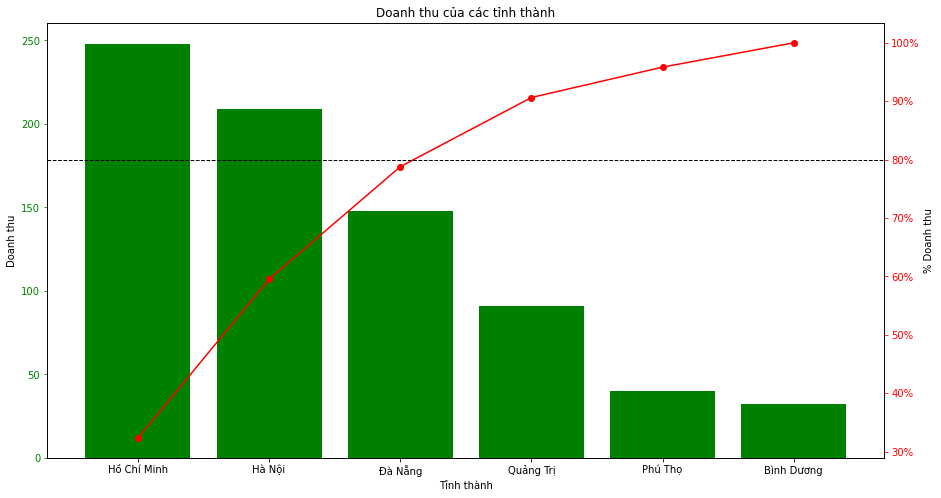

In [14]:
fig, ax = plt.subplots(figsize=(15,8))
#plot bar
# ax.bar(df_pareto.province, df_pareto.sale, color='green')
ax.bar(df_pareto.index, df_pareto.sale, color='green')
#plot line
ax2 = ax.twinx()
# ax2.plot(df_pareto.province, df_pareto['cummulative'], color='red', marker="o")
ax2.plot(df_pareto.index, df_pareto['cummulative'], color='red', marker="o")
ax2.yaxis.set_major_formatter(PercentFormatter())

#threshold 80%
ax2.axhline(80, color="black", linestyle="dashed", linewidth=1)
#color of value labels
ax.tick_params(axis='y', colors='green')
ax2.tick_params(axis='y', colors='red')
# ax.bar_label(df_pareto.sale)
#add title, label
plt.title('Doanh thu của các tỉnh thành')
ax.set_xlabel('Tỉnh thành')
ax.set_ylabel('Doanh thu')
ax2.set_ylabel('% Doanh thu')
plt.show()

Ba tỉnh Hồ Chí Minh, Hà Nội và Đà Nẵng đem lại 80% doanh thu 